In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement
%matplotlib notebook
pd.set_option('display.max_rows', 500)
# Every 100 data samples, we save 1. If things run too
# slow, try increasing this number. If things run too fast,
# try decreasing it... =)
reduce_factor = 100


# Look pretty...
matplotlib.style.use('ggplot')


# Load up the scanned armadillo
plyfile = PlyData.read('Datasets/stanford_armadillo.ply')
armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})


In [28]:
armadillo.head()

,x,y,z
0,27.283239,5.894578,11.788401
1,-56.153477,-54.866692,66.677132
2,-55.619434,-55.855236,67.534760
3,28.784435,23.476126,-31.522230
4,-54.396542,-49.803776,75.316780


<IPython.core.display.Javascript object>


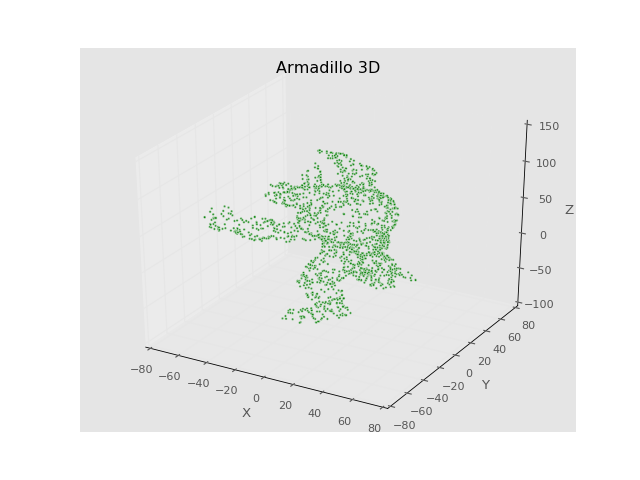

In [29]:
# Render the Original Armadillo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

In [30]:
def do_PCA(armadillo):
    #
    # TODO: Write code to import the libraries required for PCA.
    # Then, train your PCA on the armadillo dataframe. Finally,
    # drop one dimension (reduce it down to 2D) and project the
    # armadillo down to the 2D principal component feature space.
    #
    # NOTE: Be sure to RETURN your projected armadillo! 
    # (This projection is actually stored in a NumPy NDArray and
    # not a Pandas dataframe, which is something Pandas does for
    # you automatically. =)
    #
    # .. your code here ..
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca.fit(armadillo)
    T = pca.transform(armadillo)

    return T

def do_RandomizedPCA(armadillo):
    from sklearn.decomposition import RandomizedPCA
    Rpca = RandomizedPCA(n_components=2)
    Rpca.fit(armadillo)
    T = Rpca.transform(armadillo)
    return T

In [31]:
 do_PCA(armadillo)

array([[ 23.425716  , -11.34514281],
       [-45.77840237,  62.6568348 ],
       [-46.38782551,  63.60486895],
       ..., 
       [ -4.55717278,  -2.76426412],
       [ 80.42534909,  41.38446757],
       [-65.49719012, -46.46272106]])

<IPython.core.display.Javascript object>


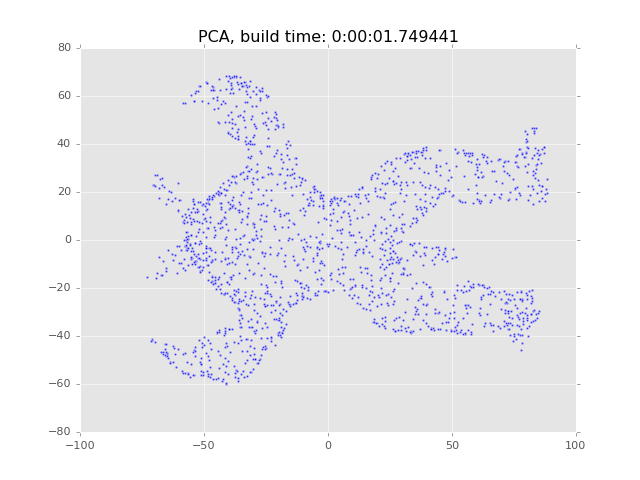

In [32]:

# Time the execution of PCA 5000x
t1 = datetime.datetime.now()
for i in range(5000): pca = do_PCA(armadillo)
time_delta = datetime.datetime.now() - t1

# Render the newly transformed PCA armadillo!
if not pca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('PCA, build time: ' + str(time_delta))
  ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)


plt.show()

<IPython.core.display.Javascript object>


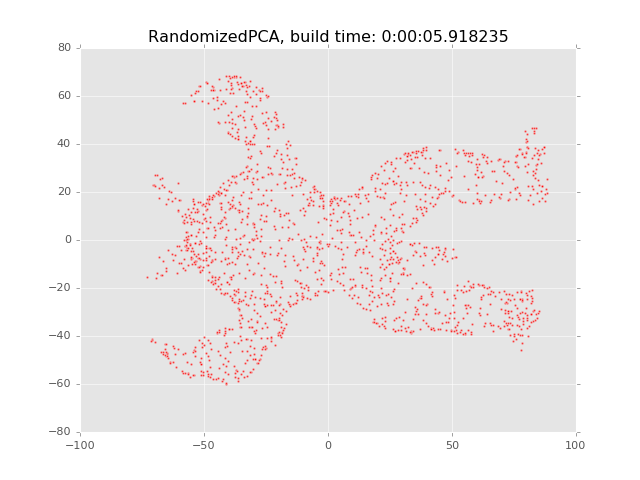

In [33]:
# Time the execution of rPCA 5000x
t1 = datetime.datetime.now()
for i in range(5000): rpca = do_RandomizedPCA(armadillo)
time_delta = datetime.datetime.now() - t1

# Render the newly transformed RandomizedPCA armadillo!
if not rpca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
  ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)
    
plt.show()

In [63]:
# Kidney data 
df = pd.read_csv('Datasets/kidney_disease.csv')
df.dropna(inplace= True)

In [64]:
df = df[['bgr','wc','rc']]
df.shape
df.bgr = pd.to_numeric(df.bgr , errors='coerce')
df.wc = pd.to_numeric(df.wc , errors='coerce')
df.rc = pd.to_numeric(df.rc , errors='coerce')

In [70]:
df.describe()

,bgr,wc,rc
count,158.000000,158.000000,158.000000
mean,131.341772,8475.949367,4.891772
std,64.939832,3126.880181,1.019364
min,70.000000,3800.000000,2.100000
25%,97.000000,6525.000000,4.500000
50%,115.500000,7800.000000,4.950000
75%,131.750000,9775.000000,5.600000
max,490.000000,26400.000000,8.000000


<IPython.core.display.Javascript object>


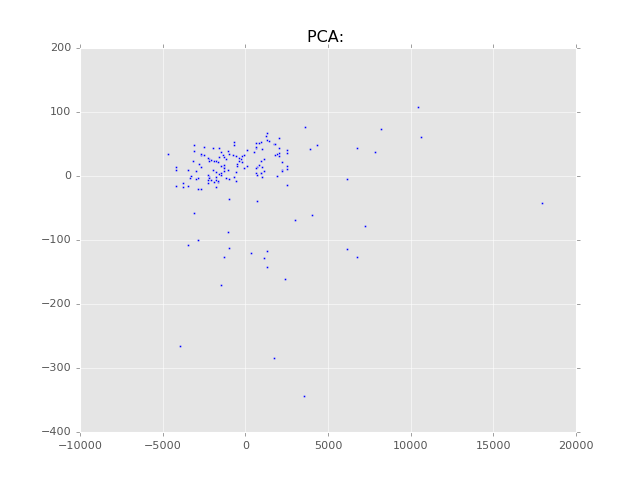

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)
T = pca.transform(df)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('PCA: ')
ax.scatter(T[:,0], T[:,1], c='blue', marker='.', alpha=1)
